In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../ResultsWSM')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Sparse Noisy

In [3]:
df_sparse_resultsWSM = pd.read_pickle(r"../ResultsWSM/simulation_resultsWSM_sparse_noisyV1.pkl")
df_sparse_results = pd.read_pickle(r"../Results/simulation_results_sparse_noisyV1.pkl")
df_sparse_resultsMerged = df_sparse_results.append(df_sparse_resultsWSM, ignore_index = True)

In [4]:
results = df_sparse_resultsMerged[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results
print("WSM run count mean : {}".format(results.loc[results['Model'] == 'WSM']['count'].mean()))

table = pd.DataFrame(columns = (["SNRlevel"] + list(df_sparse_results['Model'].unique()) + ['WSM']))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

WSM run count mean : 50.0


,SNRlevel,CorInfoMax,LDMI,PMF,WSM
4,30,29.896630,30.065604,29.420350,26.548094
3,25,24.884241,24.791452,24.092971,22.840316
2,20,20.108680,19.934867,19.093020,18.817300
1,15,15.160696,14.975271,14.218018,10.913380
0,10,10.416117,10.325829,9.290084,4.717375


In [5]:
# data = np.stack(df_sparse_results.loc[(df_sparse_results['SNRlevel'] == 30) & (df_sparse_results['Model'] == "WSM")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online WSM Sparse SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


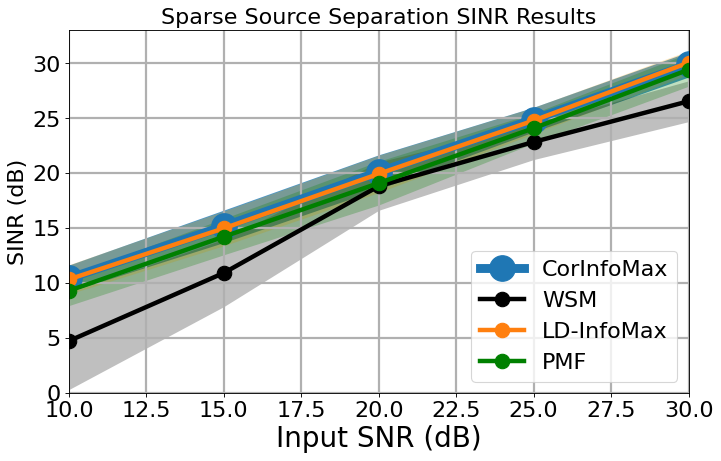

In [6]:
df_sparse_results = df_sparse_results.iloc[:df_sparse_results.shape[0] - np.mod(df_sparse_results.shape[0], 15)]
df_sparse_resultsWSM = df_sparse_resultsWSM.iloc[:df_sparse_resultsWSM.shape[0] - np.mod(df_sparse_resultsWSM.shape[0], 5)]

results = df_sparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
resultsWSM = df_sparse_resultsWSM[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRCorInfoMax = (results.loc[(results['Model'] == 'CorInfoMax')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SINRPMF = (results.loc[(results['Model'] == 'PMF')]['SINR'].to_numpy())
SINRWSM = (resultsWSM.loc[(resultsWSM['Model'] == 'WSM')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataCorInfo = df_sparse_results.loc[(df_sparse_results['Model'] == 'CorInfoMax')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataLDMI = df_sparse_results.loc[(df_sparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataPMF = df_sparse_results.loc[(df_sparse_results['Model'] == 'PMF')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataWSM = df_sparse_resultsWSM.loc[(df_sparse_resultsWSM['Model'] == 'WSM')]['SINR'].to_numpy().reshape(df_sparse_resultsWSM.shape[0]//(5),-1)

medCorInfo, perc_25CorInfo, perc_75CorInfo, stdCorInfo = perc(dataCorInfo)
# perc_25CorInfo = np.flipud(perc_25CorInfo)
# perc_75CorInfo = np.flipud(perc_75CorInfo)

medLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
# perc_25LDMI= np.flipud(perc_25LDMI)
# perc_75LDMI = np.flipud(perc_75LDMI)

medPMF, perc_25PMF, perc_75PMF, stdPMF = perc(dataPMF)
# perc_25PMF= np.flipud(perc_25PMF)
# perc_75PMF = np.flipud(perc_75PMF)

medWSM, perc_25WSM, perc_75WSM, stdWSM = perc(dataWSM)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRCorInfoMax,"-o", linewidth=8, markersize = 23, label = "CorInfoMax")
plt.fill_between(SNRinp, SINRCorInfoMax + stdCorInfo, SINRCorInfoMax - stdCorInfo, alpha=0.7, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRWSM,"-o", linewidth=4, markersize = 13, label = 'WSM', color='black')
plt.fill_between(SNRinp, SINRWSM + stdWSM, SINRWSM - stdWSM, alpha=0.25, linewidth=0, color='black')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')

plt.plot(SNRinp,SINRPMF,"-o", linewidth=4, markersize = 13, color='green', label = 'PMF')
plt.fill_between(SNRinp, SINRPMF + stdPMF, SINRPMF - stdPMF, alpha=0.25, linewidth=0, color='green')



gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower right',fontsize=20)
plt.title('Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxSparse_ComparisonNoisyV2.pdf', format='pdf')

# Nonnegative Sparse Noisy

In [7]:
df_nnsparse_resultsWSM = pd.read_pickle(r"../ResultsWSM/simulation_resultsWSM_nnsparse_noisyV1.pkl")
df_nnsparse_results = pd.read_pickle(r"../Results/simulation_results_nnsparse_noisyV1.pkl")
df_nnsparse_resultsMerged = df_nnsparse_results.append(df_nnsparse_resultsWSM, ignore_index = True)

In [8]:
results = df_nnsparse_resultsMerged[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results
print("WSM run count mean : {}".format(results.loc[results['Model'] == 'WSM']['count'].mean()))

table = pd.DataFrame(columns = (["SNRlevel"] + list(df_nnsparse_results['Model'].unique()) + ['WSM']))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

WSM run count mean : 50.0


,SNRlevel,CorInfoMax,LDMI,PMF,WSM
4,30,29.415190,29.133438,-136.189427,24.422258
3,25,25.336926,23.163863,-100.784113,22.489481
2,20,20.169046,16.937244,-65.983042,17.485844
1,15,15.250205,12.675028,-231.478959,11.916059
0,10,10.676986,9.682076,-52.292428,8.458546


In [9]:
# data = np.stack(df_nnsparse_results.loc[(df_nnsparse_results['SNRlevel'] == 30) & (df_nnsparse_results['Model'] == "WSM")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online WSM Nonnegative Sparse SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())


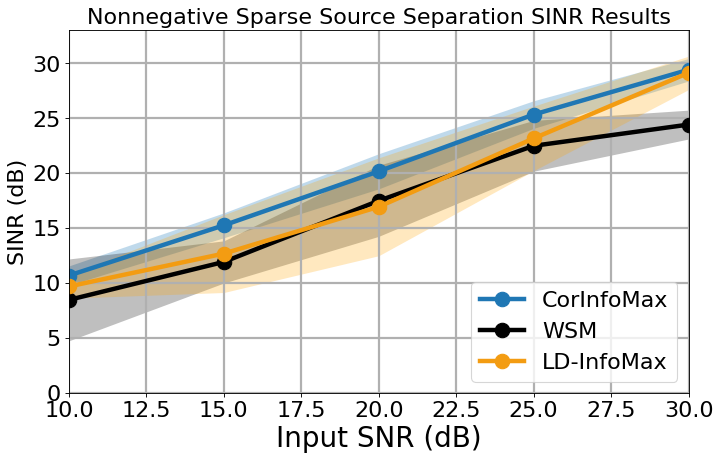

In [10]:
df_nnsparse_results = df_nnsparse_results#.iloc[:df_nnsparse_results.shape[0] - np.mod(df_nnsparse_results.shape[0], 15)]
df_nnsparse_resultsWSM = df_nnsparse_resultsWSM.iloc[:df_nnsparse_resultsWSM.shape[0] - np.mod(df_nnsparse_resultsWSM.shape[0], 5)]

results = df_nnsparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
resultsWSM = df_nnsparse_resultsWSM[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRCorInfoMax = (results.loc[(results['Model'] == 'CorInfoMax')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SINRWSM = (resultsWSM.loc[(resultsWSM['Model'] == 'WSM')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataCorInfo = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'CorInfoMax')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(15),-1)
dataLDMI = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(15),-1)
dataWSM = df_nnsparse_resultsWSM.loc[(df_nnsparse_resultsWSM['Model'] == 'WSM')]['SINR'].to_numpy().reshape(df_nnsparse_resultsWSM.shape[0]//(5),-1)

medCorInfo, perc_25CorInfo, perc_75CorInfo, stdCorInfoMax = perc(dataCorInfo)
# perc_25CorInfo = np.flipud(perc_25CorInfo)
# perc_75CorInfo = np.flipud(perc_75CorInfo)

medLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
# perc_25LDMI= np.flipud(perc_25LDMI)
# perc_75LDMI = np.flipud(perc_75LDMI)

medWSM, perc_25WSM, perc_75WSM, stdWSM = perc(dataWSM)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRCorInfoMax,"-o", linewidth=4, markersize = 13, label = "CorInfoMax")
plt.fill_between(SNRinp, SINRCorInfoMax + stdCorInfoMax, SINRCorInfoMax - stdCorInfoMax, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRWSM,"-o", linewidth=4, markersize = 13, label = 'WSM', color='black')
plt.fill_between(SNRinp, SINRWSM + stdWSM, SINRWSM - stdWSM, alpha=0.25, linewidth=0, color='black')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax', color='#F39C12')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower right',fontsize=20)
plt.title('Nonnegative Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxNNSparse_ComparisonNoisyV2.pdf', format='pdf')